# CIS 3120: Programming for Analytics Research Project - Team Gamma (Γγ)

## Roles

#### 1. How much Data is in there? 

Number of rows: 98,826

Number of columns: 15

Number of data elements: 1,482,390

#### 2. How many users are under 18 and how many are above 18? (Tenure) 

Here I figured out how many people are under and over 18, and provided a bar chart to demonstrate the numbers. There are almost 8 times more people over 18 than under 18.

Number of people under age eighteen: 11,393

Number of people over age eighteen: 87,433

#### 3. How many male and female users are there? 

The code will use the dataset in the CSV file to determine how many male and female users there are on the Facebook platform. Based on the code that I have written, there are a total of 98,828 users at the time of this dataset. There are 58,574 male users and there are 40,254 female users. So based on the data we can see there are more male users than female users. Understanding the distribution of male and female users can be valuable for businesses that rely on targeted advertising. By knowing gender distribution, businesses can optimize their ad campaigns to reach the desired audience more effectively. For example, if a company wants to promote a product predominantly used by females, they can use this data to allocate their advertising budget more efficiently.

#### 4. Compare gender with ‘friendship initiated’ 

The code will use the dataset in the CSV file to determine the count of friendships initiated based on gender. Based on the code that I have written, there are a total of 10,621,917 friendship initiations on the Facebook platform. The number of friendship initiations that were started by men is 6,037,023. The number of friendship initiations started by women is 4,584,894. Based on this analysis, we can see the overwhelming activity on the males' part. This gender information can be utilized to gain insights into user preferences and behaviors. Businesses can analyze the patterns and interests of male and female users separately to identify potential gaps in the market or opportunities for product development. This data can guide decisions related to product features, design, and marketing strategies.

#### 5. How many mobile likes AND how many web likes are there (graph)? 

The code will calculate and draw a graph to analyze the amount likes in the data set which includes Total likes of 15,427,901, Mobile likes of 10,490,167, and www likes of 4,937,729. As well as it creates a bar chart to determine who gained the most likes.

#### 6. Male and female received likes count in total and comparison in a graph (count and analyze using graph)?  

Here, the code will use the dataset and find out how many likes have been received by Males and Females. After that, it will demonstrate the comparison of likes received by Males and Females in percentage, which is approximately 72.99% (Received by Females) less in terms of males which is 27.01. And this percentage is an accumulation of Likes, Mobile likes, and www Likes.

#### 7. Users who were born before and after the year 2000? 

Through inquiry, the youngest age of users in the data is 13 years old. I don't know when the latest update of this data is, but relevant regulations may limit the use of users' ages. Therefore, people born before 2000 can use Facebook, and they make up a significant majority of users. However, some people born after 2000 cannot use Facebook due to age restrictions; thus, their proportion is relatively small.

#### 8. Tenure cells for male and female users? 

This section primarily demonstrates the average tenure call for male and female users. The results show that the gap between the two is minimal, with the male average being 500.02 days and the female average being 587.23 days. This result indicates that both male and female users are very enthusiastic about using Facebook, and it is difficult to attribute usage differences to gender differences based on these results.

#### 9. Compare tenure with likes received and friendship initiated 

With Tenure vs. likes received, there is a minimal correlation. Most people who create accounts do not achieve popularity based on the age of the account. In rare cases, some people got a high amount of likes when they first made an account, most likely since they brought in a fanbase that is already connected to the creator.

With tenure vs friendship initiated and friend count, there is a low positive correlation between when you created your account and how many friends you added. It can be seen that you’ll meet more people as you use FaceBook more, but it is not a drastic amount. We can assume that people do not socialize more online and prefer other options. 

#### 10. Describe new user data based on tenure 

After creating the new user rate of < 365 days, I was able to compare tenure with age and gender. It can be seen that people in their teens and early twenties dropping off the website or creating an account. I know this data can have caveats since some users are new, while some users are churned. Churn data is a metric that represents the number of customers that have stopped using the product or service during a given period of time. Through the data, we specifically see that the most active age group is 12-25. Relating to gender, more males are new or are leaving. Since this data was captured 4 years ago, this makes sense as 2019 was a year when more people were getting internet throughout the world.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

data = pd.read_csv('pseudo_facebook.csv')

data.dropna(inplace=True)

In [2]:
num_rows = len(data.index)
num_cols = len(data.columns)

num_data = data.size

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"Number of data elements: {num_data}")

Number of rows: 98826
Number of columns: 15
Number of data elements: 1482390


In [3]:
under_18 = data[data['age'] < 18]

over_18 = data[data['age'] >= 18]

print(f"Number of people under 18: {len(under_18)}")
print(f"Number of people over 18: {len(over_18)}")

Number of people under 18: 11393
Number of people over 18: 87433


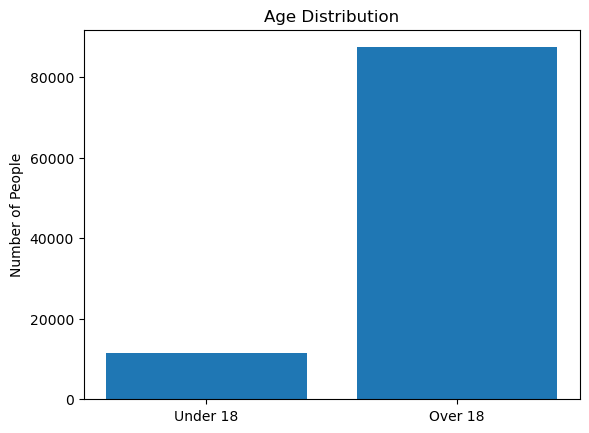

In [4]:
under_18 = len(data[data['age'] < 18])
over_18 = len(data[data['age'] >= 18])


pt.bar(['Under 18', 'Over 18'], [under_18, over_18])
pt.ylabel('Number of People')
pt.title('Age Distribution')
pt.show()


## Tanbir



In [5]:
data.head()

num_male = (data['gender']== 'male').sum()
num_female = (data['gender'] == 'female').sum()

print(f" Number of Male Users: {num_male}")
print(f" Number of Female Users: {num_female}")

 Number of Male Users: 58574
 Number of Female Users: 40252


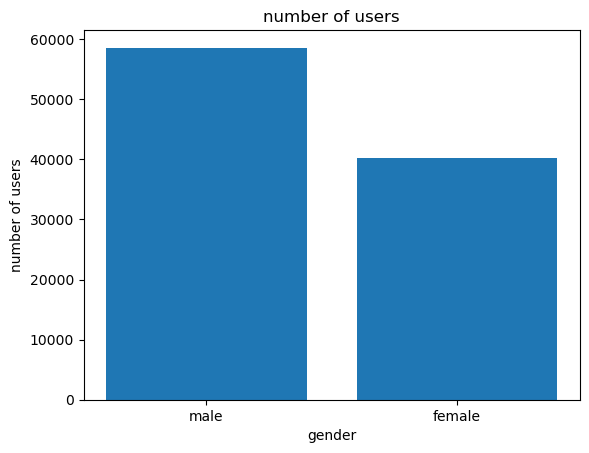

In [6]:
num_male = (data['gender'] == 'male').sum()
num_female = (data['gender'] == 'female').sum()

pt.bar(['male','female'], [num_male, num_female])

pt.xlabel('gender')
pt.ylabel('number of users')
pt.title ('number of users')

pt.show()

In [7]:
male_f_count = data[data['gender'] == 'male']['friendships_initiated'].sum()
female_f_count = data[data['gender'] == 'female']['friendships_initiated'].sum()

print(f'Number of Friendship Initiations started by Men: {male_f_count}')
print(f'Number of Friendship Initiations started by Women: {female_f_count}')
print(f'Number of Total Friendship Initiations: {male_f_count + female_f_count}')

Number of Friendship Initiations started by Men: 6037023
Number of Friendship Initiations started by Women: 4584801
Number of Total Friendship Initiations: 10621824


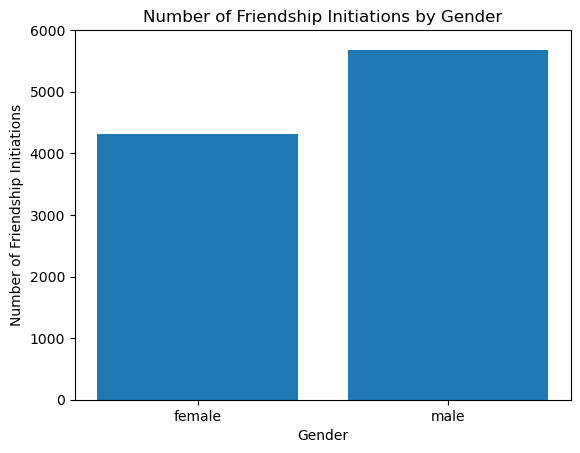

In [8]:
data = data.groupby('gender')['friendships_initiated'].sum()

total_f_count = data.sum()

proportions = data / total_f_count

factor = 10000
w_numbers = proportions * factor

pt.bar(w_numbers.index, w_numbers.values)
pt.xlabel('Gender')
pt.ylabel('Number of Friendship Initiations')

pt.title('Number of Friendship Initiations by Gender')

pt.ylim(0,6000)
pt.show()

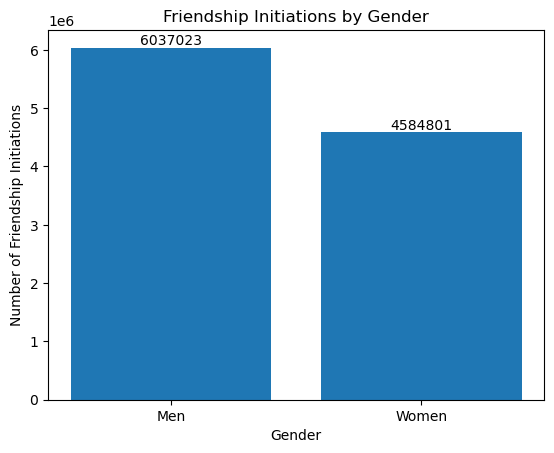

In [9]:
men_friendships = data['male']
women_friendships = data['female']


pt.bar(['Men', 'Women'], [men_friendships, women_friendships])
pt.xlabel('Gender')
pt.ylabel('Number of Friendship Initiations')
pt.title('Friendship Initiations by Gender')


pt.text(0, men_friendships, str(men_friendships), ha='center', va='bottom')
pt.text(1, women_friendships, str(women_friendships), ha='center', va='bottom')


pt.show()

## Nahid
### 5

In [10]:
data = pd.read_csv('pseudo_facebook.csv')

data.dropna(inplace=True)


likes = data['likes']
mobile_likes = data['mobile_likes']
www_likes = data['www_likes']


total_likes = likes.sum()
total_mobile_likes = mobile_likes.sum()
total_www_likes = www_likes.sum()


print("Total Likes: ", total_likes)
print("Total Mobile Likes: ", total_mobile_likes)
print("Total www Likes: ", total_www_likes)

Total Likes:  15427901
Total Mobile Likes:  10490167
Total www Likes:  4937729


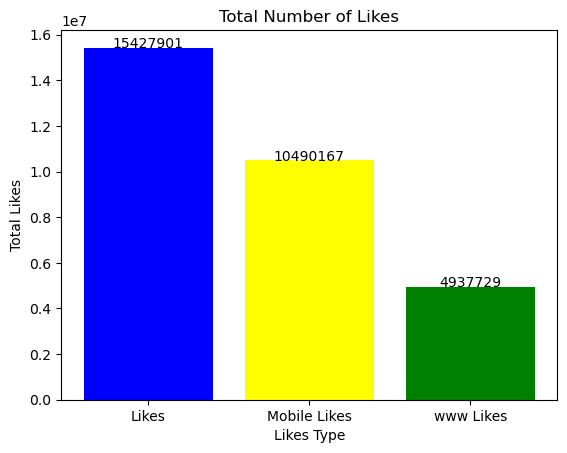

In [11]:

total_likes = likes + mobile_likes + www_likes


labels = ['Likes', 'Mobile Likes', 'www Likes']
values = [likes.sum(), mobile_likes.sum(), www_likes.sum()]
colors = ['blue', 'yellow', 'green']


fig, ax = pt.subplots()
ax.bar(labels, values, color=colors)


for i, v in enumerate(values):
    ax.text(i, v + 100, str(v), ha='center')


ax.set_xlabel('Likes Type')
ax.set_ylabel('Total Likes')
ax.set_title('Total Number of Likes')


pt.show()

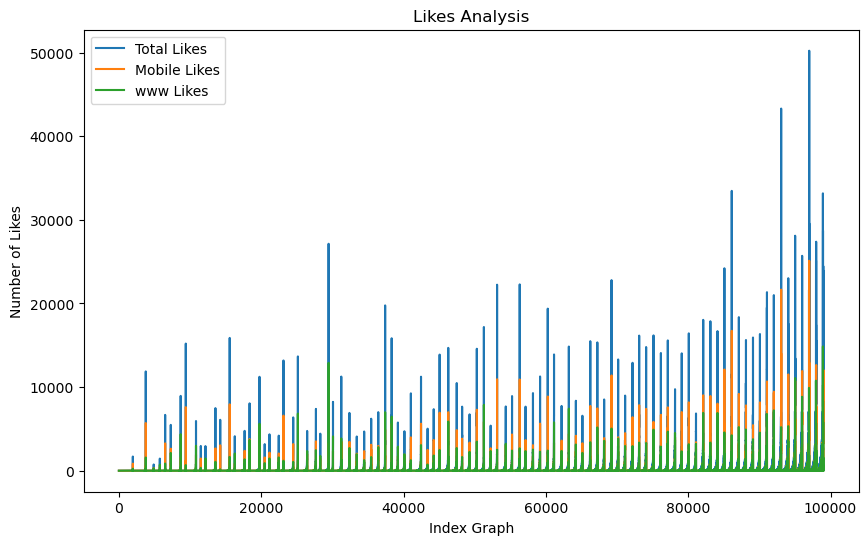

In [12]:

total_likes = likes + mobile_likes + www_likes


pt.figure(figsize=(10, 6))
pt.plot(total_likes, label='Total Likes')
pt.plot(mobile_likes, label='Mobile Likes')
pt.plot(www_likes, label='www Likes')


pt.xlabel('Index Graph')
pt.ylabel('Number of Likes')
pt.title('Likes Analysis')


pt.legend()


pt.show()

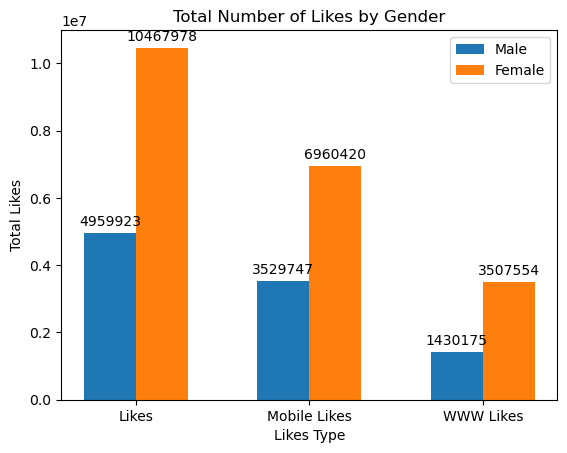

In [13]:
gender = data['gender']


male_likes = likes[gender == 'male'].sum()
male_mobile_likes = mobile_likes[gender == 'male'].sum()
male_www_likes = www_likes[gender == 'male'].sum()

female_likes = likes[gender == 'female'].sum()
female_mobile_likes = mobile_likes[gender == 'female'].sum()
female_www_likes = www_likes[gender == 'female'].sum()


categories = ['Likes', 'Mobile Likes', 'WWW Likes']
male_values = [male_likes, male_mobile_likes, male_www_likes]
female_values = [female_likes, female_mobile_likes, female_www_likes]

x = np.arange(len(categories))
width = 0.30

fig, ax = pt.subplots()
rects1 = ax.bar(x - width/2, male_values, width, label='Male')
rects2 = ax.bar(x + width/2, female_values, width, label='Female')


ax.set_xlabel('Likes Type')
ax.set_ylabel('Total Likes')
ax.set_title('Total Number of Likes by Gender')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height),

                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

pt.show()

In [14]:
gender = data['gender']
likes_received = data['likes_received']
mobile_likes_received = data['mobile_likes_received']
www_likes_received = data['www_likes_received']


male_total_likes = likes_received[gender == 'male'].sum()
male_mobile_likes = mobile_likes_received[gender == 'male'].sum()
male_www_likes = www_likes_received[gender == 'male'].sum()

female_total_likes = likes_received[gender == 'female'].sum()
female_mobile_likes = mobile_likes_received[gender == 'female'].sum()
female_www_likes = www_likes_received[gender == 'female'].sum()


print("Total 'Likes' Received for Males: ", male_total_likes)
print("Total 'Mobile Likes' Received for Males: ", male_mobile_likes)
print("Total 'www Likes' Received for Males: ", male_www_likes)


print("Total 'Likes' Received for Females: ", female_total_likes)
print("Total 'Mobile Likes' Received for Females: ", female_mobile_likes)
print("Total 'www Likes' Received for Females: ", female_www_likes)

Total 'Likes' Received for Males:  3977851
Total 'Mobile Likes' Received for Males:  2391753
Total 'www Likes' Received for Males:  1586098
Total 'Likes' Received for Females:  10121203
Total 'Mobile Likes' Received for Females:  5921375
Total 'www Likes' Received for Females:  4199824


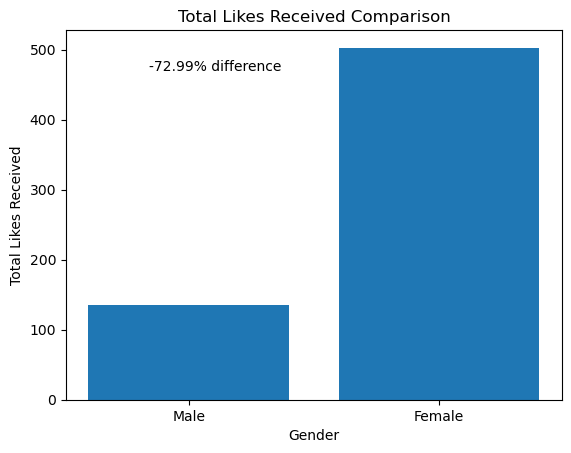

In [15]:

male_data = data[data['gender'] == 'male']
female_data = data[data['gender'] == 'female']


male_likes = male_data['likes_received'] + male_data['mobile_likes_received'] + male_data['www_likes_received']
female_likes = female_data['likes_received'] + female_data['mobile_likes_received'] + female_data['www_likes_received']


percentage_diff = ((male_likes.mean() - female_likes.mean()) / female_likes.mean()) * 100


label = ['Male', 'Female']
values = [male_likes.mean(), female_likes.mean()]

pt.bar(label, values)
pt.title('Total Likes Received Comparison')
pt.ylabel('Total Likes Received')
pt.xlabel('Gender')


pt.text(0.3, 0.9, f"{percentage_diff:.2f}% difference", horizontalalignment='center', verticalalignment='center', transform=pt.gca().transAxes)

pt.show()

In [16]:
born_before_2000 = data[data['dob_year'] < 2000]
born_after_2000 = data[data['dob_year'] >= 2000]

before_2000_count = len(born_before_2000)
after_2000_count = len(born_after_2000)

print(f" Number of Born before 2000: {before_2000_count}")
print(f" Number of Born after 2000: {after_2000_count}")

 Number of Born before 2000: 98342
 Number of Born after 2000: 484


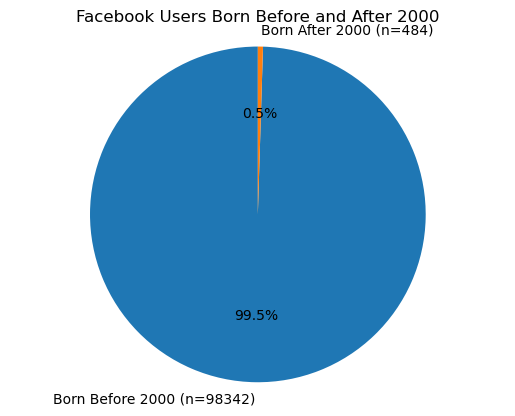

In [17]:
born_before_2000 = data[data['dob_year'] < 2000]
born_after_2000 = data[data['dob_year'] >= 2000]

before_2000_count = len(born_before_2000)
after_2000_count = len(born_after_2000)

labels = [f'Born Before 2000 (n={before_2000_count})', f'Born After 2000 (n={after_2000_count})']
sizes = [before_2000_count, after_2000_count]
pt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pt.axis('equal')
pt.title('Facebook Users Born Before and After 2000')
pt.show()

In [18]:
male_users = data[data['gender'] == 'male']
female_users = data[data['gender'] == 'female']

average_male_tenure = male_users['tenure'].mean()
average_female_tenure = female_users['tenure'].mean()

print(f" Average Tenure for Male: {average_male_tenure}")
print(f" Average Tenure for Female: {average_female_tenure}")

 Average Tenure for Male: 500.20439102673544
 Average Tenure for Female: 587.2292308456723


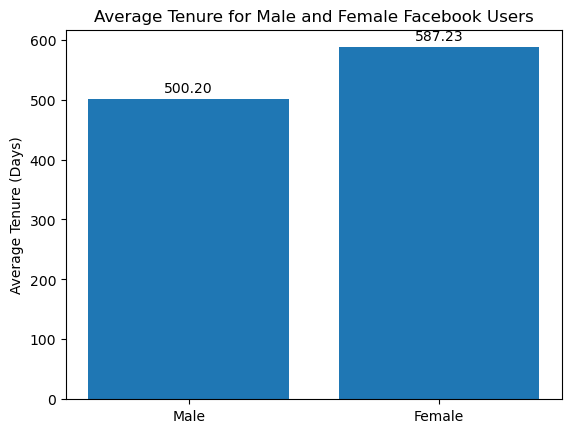

In [19]:
male_users = data[data['gender'] == 'male']
female_users = data[data['gender'] == 'female']

average_male_tenure = male_users['tenure'].mean()
average_female_tenure = female_users['tenure'].mean()

labels = ['Male', 'Female']
average_tenures = [average_male_tenure, average_female_tenure]
bars = pt.bar(labels, average_tenures)
pt.ylabel('Average Tenure (Days)')
pt.title('Average Tenure for Male and Female Facebook Users')

for bar in bars:
    height = bar.get_height()
    pt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

pt.show()

In [20]:

tenure = data['tenure']


corr_coef = np.corrcoef(tenure, likes_received)[0, 1]


tenure_mean = np.mean(tenure)
tenure_std = np.std(tenure)
tenure_min = np.min(tenure)
tenure_max = np.max(tenure)

likes_mean = np.mean(likes_received)
likes_std = np.std(likes_received)
likes_min = np.min(likes_received)
likes_max = np.max(likes_received)


print(f'Tenure: mean={tenure_mean:.2f}, std={tenure_std:.2f}, min={tenure_min:.2f}, max={tenure_max:.2f}')
print(f'Likes: mean={likes_mean:.2f}, std={likes_std:.2f}, min={likes_min:.2f}, max={likes_max:.2f}')
print(f'Correlation coefficient: {corr_coef:.2f}')

Tenure: mean=535.65, std=454.26, min=0.00, max=3139.00
Likes: mean=142.67, std=1388.98, min=0.00, max=261197.00
Correlation coefficient: 0.03


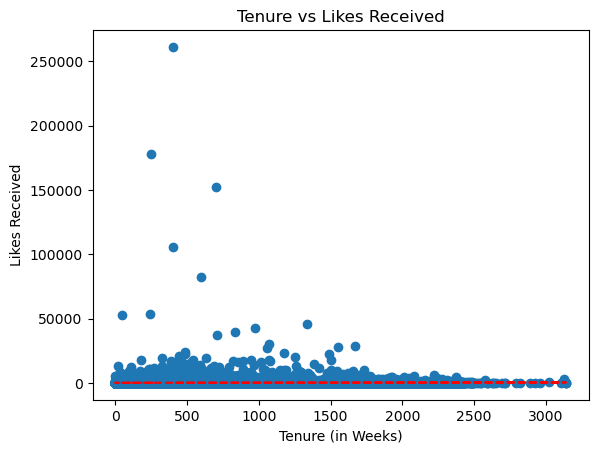

In [21]:
x = tenure
y = likes_received

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pt.plot(x,p(x),"r--")


pt.scatter(x, y)


pt.title('Tenure vs Likes Received')
pt.xlabel('Tenure (in Weeks)')
pt.ylabel('Likes Received')


pt.show()

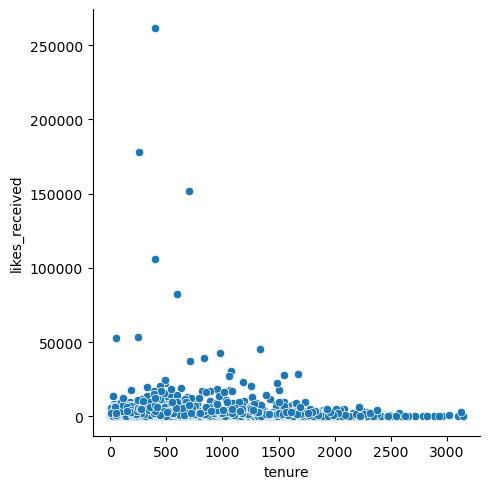

In [22]:

sns.relplot(data=tenure, x=tenure, y=likes_received)

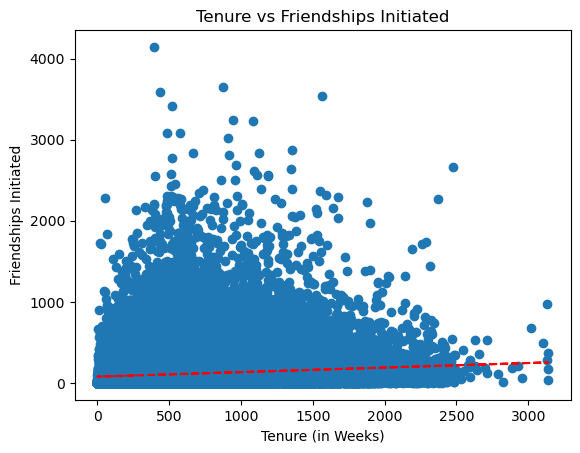

In [23]:
friendships_initiated = data['friendships_initiated']

x = tenure
y = friendships_initiated

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pt.plot(x,p(x),"r--")


pt.scatter(x, y)


pt.title('Tenure vs Friendships Initiated')
pt.xlabel('Tenure (in Weeks)')
pt.ylabel('Friendships Initiated')


pt.show()

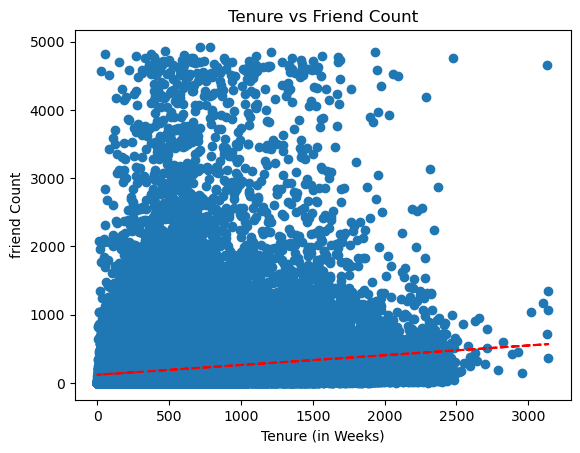

In [24]:
friend_count = data['friend_count']

x = tenure
y = friend_count

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pt.plot(x,p(x),"r--")


pt.scatter(x, y)


pt.title('Tenure vs Friend Count')
pt.xlabel('Tenure (in Weeks)')
pt.ylabel('friend Count')


pt.show()

## Tausi
### 10

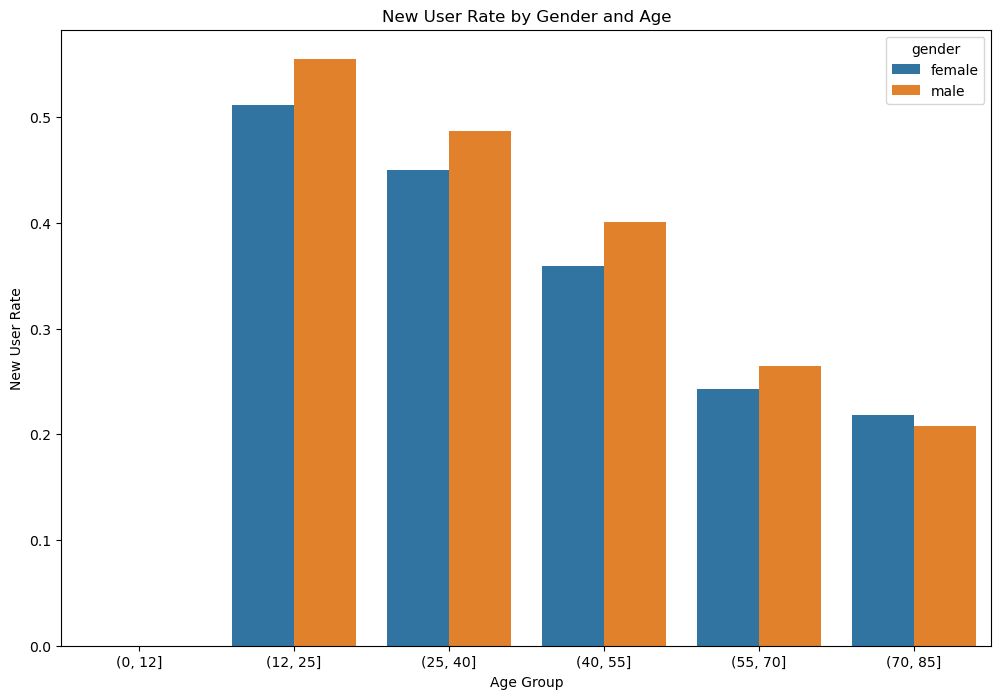

In [25]:
data['churned'] = data['tenure'].apply(lambda x: 1 if x < 365 else 0)
churn_rate = data.groupby(['gender',pd.cut(data['age'], bins=[0, 12, 25, 40, 55, 70, 85])])['churned'].mean().reset_index()

pt.figure(figsize=(12, 8))
sns.barplot(x='age', y='churned', hue='gender', data=churn_rate)
pt.xlabel('Age Group')
pt.ylabel('New User Rate')
pt.title('New User Rate by Gender and Age')
pt.show()

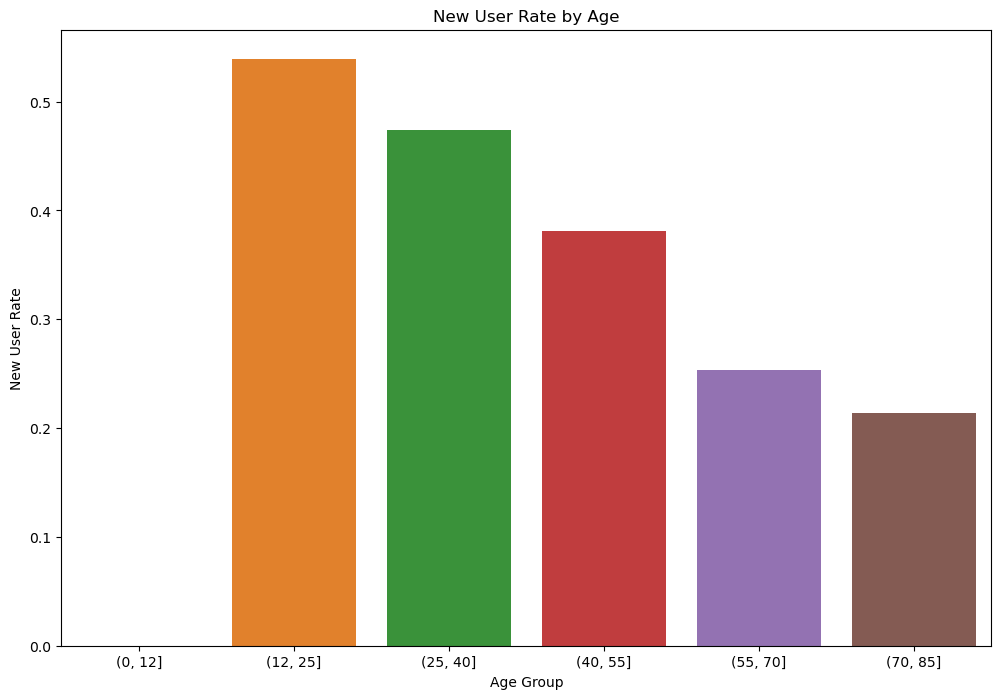

In [26]:
churn_rate = data.groupby([pd.cut(data['age'], bins=[0, 12, 25, 40, 55, 70, 85])])['churned'].mean().reset_index()

pt.figure(figsize=(12, 8))
sns.barplot(x='age', y='churned', data=churn_rate)
pt.xlabel('Age Group')
pt.ylabel('New User Rate')
pt.title('New User Rate by Age')
pt.show()